In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
 
#其实日常在导库的时候，并不是一次性能够知道我们要用的所有库的。通常都是在建模过程中逐渐导入需要的库。

In [2]:
data = pd.read_csv(r"./rankingcard.csv",index_col=0)

In [3]:
#观察数据类型
data.head()#注意可以看到第一列为标签，剩下的10列为特征
 
#观察数据结构
data.shape#(150000, 11)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [4]:
#去除重复值
data.drop_duplicates(inplace=True)#inplace=True表示替换原数据
 
data.info()
 
#删除之后千万不要忘记，恢复索引
data.index = range(data.shape[0])
 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                     

In [5]:
#探索缺失值
data.info()
data.isnull().sum()/data.shape[0]#得到缺失值的比例
#data.isnull().mean()#上一行代码的另一种形式书写

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [6]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)
#这里用均值填补家庭人数这一项 
#如果你选择的是删除那些缺失了2.5%的特征，千万记得恢复索引哟~
 
data.info()
data.isnull().sum()/data.shape[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [7]:
def fill_missing_rf(X,y,to_fill):

    """
    使用随机森林填补一个特征的缺失值的函数

    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """

    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)

    # 找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]

    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)

    return Ypredict

In [8]:
X = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]#y = data.iloc[:,0]
X.shape#(149391, 10)

#=====[TIME WARNING:1 min]=====#
y_pred = fill_missing_rf(X,y,"MonthlyIncome")

#注意可以通过以下代码检验数据是否数量相同
# y_pred.shape ==  data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"].shape

#确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           149391 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [9]:
#描述性统计
# data.describe()
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T
 


,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5426.299829,13230.153383,0.0,0.0,0.170000,1800.000000,4423.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [10]:
#异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以
# 查看一下年龄为0的人有多少
(data["age"] == 0).sum()
#发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]
 
"""
另外，有三个指标看起来很奇怪：
 
"NumberOfTime30-59DaysPastDueNotWorse"
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"
 
这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2，最大值却是
98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？
 
我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
 
"""
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90]
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()
data.loc[:,"NumberOfTimes90DaysLate"].value_counts()
 
#有225个样本存在这样的情况，并且这些样本，我们观察一下，标签并不都是1，他们并不都是坏客户。因此，我们基
# 本可以判断，这些样本是某种异常，应该把它们删除。
 
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]
#一定要恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [11]:
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
y.value_counts()#查看每一类别值得数据量，查看样本是否均衡
 
n_sample = X.shape[0]
 
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))
#样本个数：149165; 1占6.62%; 0占93.38%

样本个数：149165; 1占6.62%; 0占93.38%


In [12]:
#如果报错，就在prompt安装：pip install imblearn
import imblearn
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似
 
from imblearn.over_sampling import SMOTE
 
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_sample(X,y)
 
n_sample_ = X.shape[0]#278584

pd.Series(y).value_counts()
 
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))
#样本个数：278584; 1占50.00%; 0占50.00%

样本个数：278584; 1占50.00%; 0占50.00%


In [13]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)
 
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1)#训练数据构建模型
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns
 
vali_data = pd.concat([Y_vali, X_vali], axis=1)#验证集
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns
 
model_data.to_csv(r"./data/rc_model_data.csv")#训练数据
vali_data.to_csv(r"./data/rc_vali_data.csv")#验证数据


In [14]:
# dataframe["列名"]
#当这个列存在的时候，就是索引；当这个列名不存在的时候，DataFrame会自动生成叫做这个列名的一个新的列


#按照等频对需要分箱的列进行分箱

#“age”为例子
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)#等频分箱
 
"""
pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q：要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
"""
#在这里时让model_data新添加一列叫做“分箱”，这一列其实就是每个样本所对应的箱子
model_data.head()
model_data["qcut"]
model_data["qcut"].value_counts()
 
#所有箱子的上限和下限
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [15]:
# 统计每个分箱中0和1的数量
# 这里使用了数据透视表的功能groupby
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]

coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]
 
#注意zip会按照最短列来进行结合
num_bins

[(21.0, 28.0, 4243, 7579),
 (28.0, 31.0, 3571, 5947),
 (31.0, 34.0, 4075, 6718),
 (34.0, 36.0, 2908, 4596),
 (36.0, 39.0, 5182, 7486),
 (39.0, 41.0, 3956, 5827),
 (41.0, 43.0, 4002, 5678),
 (43.0, 45.0, 4389, 5962),
 (45.0, 46.0, 2419, 3250),
 (46.0, 48.0, 4813, 6178),
 (48.0, 50.0, 4900, 6169),
 (50.0, 52.0, 4728, 5838),
 (52.0, 54.0, 4681, 5041),
 (54.0, 56.0, 4677, 4034),
 (56.0, 58.0, 4483, 3429),
 (58.0, 61.0, 6583, 4796),
 (61.0, 64.0, 6968, 3196),
 (64.0, 68.0, 6623, 2292),
 (68.0, 74.0, 6753, 1902),
 (74.0, 107.0, 7737, 1399)]

In [16]:
 0 in num_bins[0][2:]

False

In [17]:
for i in range(20):
    #如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(
            num_bins[0][0],
            num_bins[1][1],
            num_bins[0][2]+num_bins[1][2],
            num_bins[0][3]+num_bins[1][3])]
        continue

    """
    合并了之后，第一行的组是否一定有两种样本了呢？不一定
    如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并之后，第一行的组也还是没有
    包含两种样本
    所以我们在每次合并完毕之后，还需要再检查，第一组是否已经包含了两种样本
    这里使用continue跳出了本次循环，开始下一次循环，所以回到了最开始的for i in range(20), 让i+1
    这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
    如果第一组中依然没有包含两种样本，则if通过，继续合并，每合并一次就会循环检查一次，最多合并20次
    如果第一组中已经包含两种样本，则if不通过，就开始执行下面的代码
    """
    #已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并
    #此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并
    #但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1] = [(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2]+num_bins[i][2],
                num_bins[i-1][3]+num_bins[i][3])]
        break
        #如果对第一组和对后面所有组的判断中，都没有进入if去合并，则提前结束所有的循环
    else:
        break

    """
    这个break，只有在if被满足的条件下才会被触发
    也就是说，只有发生了合并，才会打断for i in range(len(num_bins))这个循环
    为什么要打断这个循环？因为我们是在range(len(num_bins))中遍历
    但合并发生后，len(num_bins)发生了改变，但循环却不会重新开始
    举个例子，本来num_bins是5组，for i in range(len(num_bins))在第一次运行的时候就等于for i in 
    range(5)
    range中输入的变量会被转换为数字，不会跟着num_bins的变化而变化，所以i会永远在[0,1,2,3,4]中遍历
    进行合并后，num_bins变成了4组，已经不存在=4的索引了，但i却依然会取到4，循环就会报错
    因此在这里，一旦if被触发，即一旦合并发生，我们就让循环被破坏，使用break跳出当前循环
    循环就会回到最开始的for i in range(20)中
    此时判断第一组是否有两种标签的代码不会被触发，但for i in range(len(num_bins))却会被重新运行
    这样就更新了i的取值，循环就不会报错了
    """

In [18]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
 
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)

    df["total"] = df.count_0 + df.count_1#一个箱子当中所有的样本数
    df["percentage"] = df.total / df.total.sum()#一个箱子里的样本数，占所有样本的比例
    df["bad_rate"] = df.count_1 / df.total#一个箱子坏样本的数量占一个箱子里边所有样本数的比例
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
 
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

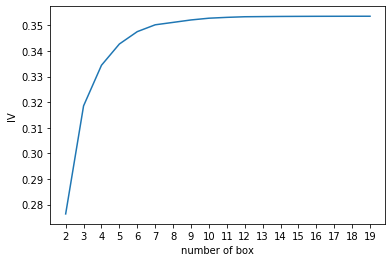

In [19]:
num_bins_ = num_bins.copy()
 
import matplotlib.pyplot as plt
import scipy
 
IV = []
axisx = []
 
while len(num_bins_) > 2:#大于设置的最低分箱个数
    pvs = []
    #获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2: ]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]#p值
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]#计算卡方值
        pvs.append(pv)
        
    # 通过 p 值进行处理。合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3])]
    
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()
#选择转折点处，也就是下坠最快的折线点，所以这里对于age来说选择箱数为6

In [20]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                num_bins_[i][0],
                num_bins_[i+1][1],
                num_bins_[i][2]+num_bins_[i+1][2],
                num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_
 
afterbins = get_bin(num_bins,6)
 
afterbins

[(21.0, 36.0, 14797, 24840),
 (36.0, 54.0, 39070, 51429),
 (54.0, 61.0, 15743, 12259),
 (61.0, 64.0, 6968, 3196),
 (64.0, 74.0, 13376, 4194),
 (74.0, 107.0, 7737, 1399)]

In [21]:
bins_df = get_woe(num_bins)
 
bins_df
#希望每组的bad_rate相差越大越好；
# woe差异越大越好，应该具有单调性，随着箱的增加，要么由正到负，要么由负到正，只能有一个转折过程；
# 如果woe值大小变化是有两个转折，比如呈现w型，证明分箱过程有问题
# num_bins保留的信息越多越好

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24840,39637,0.203258,0.626687,0.151467,0.255248,-0.521867
1,36.0,54.0,39070,51429,90499,0.464078,0.568283,0.399934,0.528469,-0.278683
2,54.0,61.0,15743,12259,28002,0.143594,0.437790,0.161151,0.125970,0.246300
3,61.0,64.0,6968,3196,10164,0.052121,0.314443,0.071327,0.032841,0.775592
4,64.0,74.0,13376,4194,17570,0.090099,0.238702,0.136922,0.043096,1.155971
5,74.0,107.0,7737,1399,9136,0.046849,0.153130,0.079199,0.014376,1.706421


In [22]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    '''
    自动最优分箱函数，基于卡方检验的分箱

    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像

    区间为前开后闭 (]

    '''
    
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    bins_df = None
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

RevolvingUtilizationOfUnsecuredLines


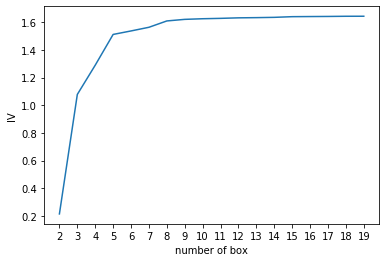

age


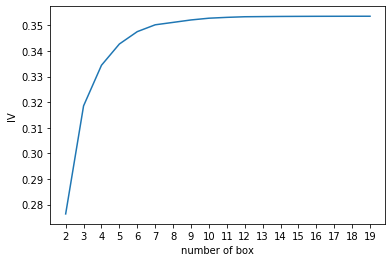

NumberOfTime30-59DaysPastDueNotWorse


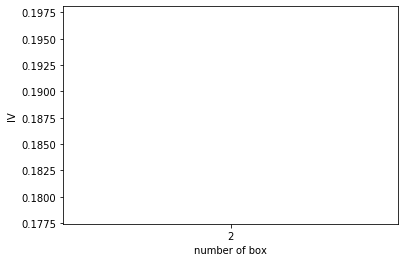

DebtRatio


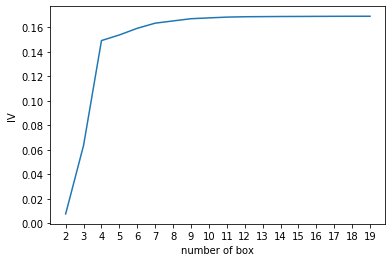

MonthlyIncome


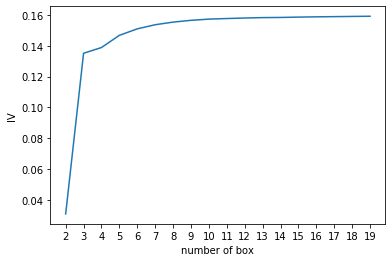

NumberOfOpenCreditLinesAndLoans


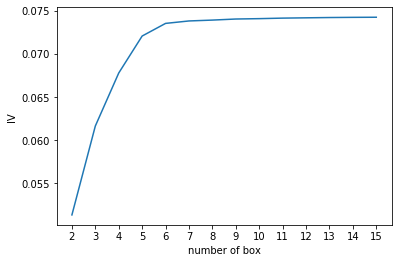

NumberOfTimes90DaysLate


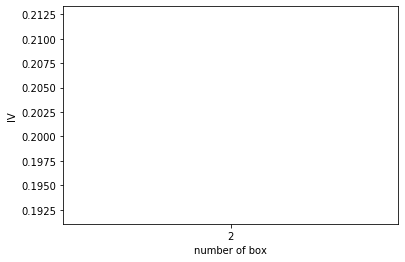

NumberRealEstateLoansOrLines


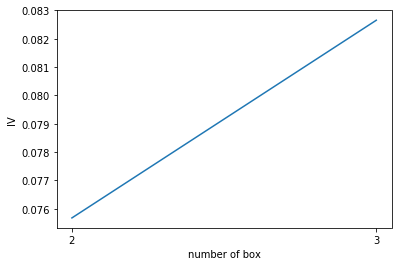

NumberOfTime60-89DaysPastDueNotWorse


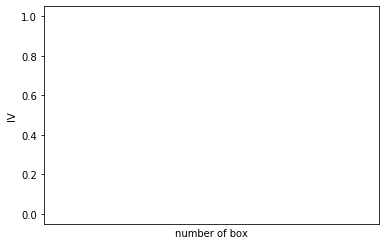

NumberOfDependents


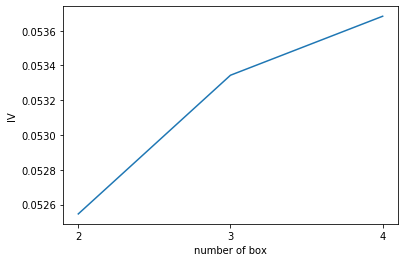

In [23]:
model_data.columns

for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20)

In [24]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                "age":5,
                "DebtRatio":4,
                "MonthlyIncome":3,
                "NumberOfOpenCreditLinesAndLoans":5}
 
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}
 
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值 
#原因：比如一些新的值出现，例如家庭人数为30，以前没出现过，改成范围为极大值之后，这些新值就都能分到箱里边了
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [25]:
bins_of_col = {}
 
# 生成自动分箱的分箱区间和分箱后的 IV 值
 
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
    
#合并手动分箱数据    
bins_of_col.update(hand_bins)
 
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09900701999999999,
  0.2977479408,
  0.4651482576264989,
  0.9824874831020626,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.017512738758237893,
  0.4016343807644366,
  1.4705647294000002,
  inf],
 'MonthlyIncome': [-inf, 0.1, 6171.962401351763, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [26]:
data = model_data.copy()
 
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()
 
data["cut"] = pd.cut(data["age"],[-np.inf, 48.49986200790144, 58.757170160044694, 64.0, 74.0, np.inf])
 
data.head()

#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()
 
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
 
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
 
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 48.5]",39558,59221,-0.407344
"(48.5, 58.757]",23469,24511,-0.047277
"(58.757, 64.0]",13551,7992,0.524184
"(64.0, 74.0]",13376,4194,1.155971
"(74.0, inf]",7737,1399,1.706421


In [27]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe
 
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
    
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.199603
 (0.099, 0.298]    0.668818
 (0.298, 0.465]   -0.124900
 (0.465, 0.982]   -1.073818
 (0.982, 1.0]     -0.478294
 (1.0, inf]       -2.034700
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.521867
 (36.0, 54.0]   -0.278683
 (54.0, 61.0]    0.246300
 (61.0, 74.0]    1.008823
 (74.0, inf]     1.706421
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0175]     1.524494
 (0.0175, 0.402]    0.035256
 (0.402, 1.471]    -0.388319
 (1.471, inf]       0.175816
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.1]        1.354011
 (0.1, 6171.962]   -0.218762
 (6171.962, inf]    0.269045
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.847844
 (1.0, 3.0]    -0.330325
 (3.0, 5.0]    -0.055560
 (5.0, 17.0]    0.124200
 (17.0, inf]    0.465473
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.351544
 (0.0, 1.0]    -0.871682
 (1.0, 2.0]    -1.373092
 (2.0, inf]    -1.542015
 dtype: floa

In [28]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
 
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])
 
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
    
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
 
#这就是我们的建模数据了
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.278683,2.199603,0.035256,-0.218762,-0.05556,0.351544,0.235632,-0.394769,0.124632,0.625988,0
1,1.008823,0.668818,0.035256,-0.218762,-0.05556,0.351544,0.235632,-0.394769,0.124632,0.625988,0
2,-0.278683,-2.034700,-0.388319,-0.218762,-0.05556,-0.871682,-1.754467,-0.394769,-1.768208,-0.474234,1
3,1.008823,2.199603,-0.388319,-0.218762,0.12420,0.351544,0.235632,0.616878,0.124632,0.625988,0
4,-0.278683,-1.073818,-0.388319,0.269045,0.12420,0.351544,0.235632,0.616878,0.124632,-0.580717,1


In [29]:
vali_woe = pd.DataFrame(index=vali_data.index)
 
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
 
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [30]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
 
from sklearn.linear_model import LogisticRegression as LR
 
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)

0.7740738968124821

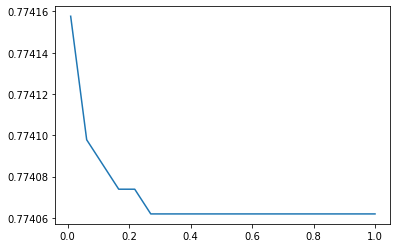

c:\program files\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

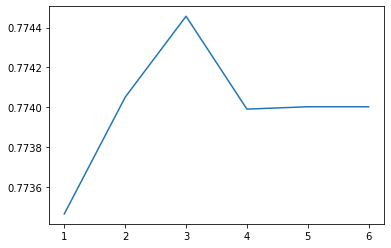

In [31]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
 
score = []
for i in c_1: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()
 
lr.n_iter_#array([7], dtype=int32)
 
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

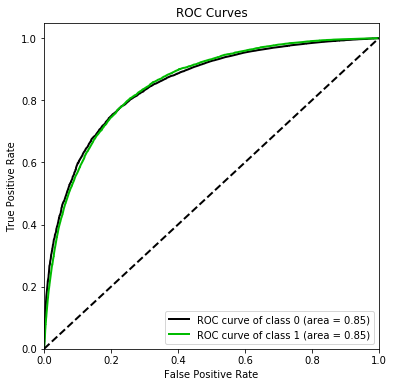

In [32]:
import scikitplot as skplt
 
#%%cmd
#pip install scikit-plot
 
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

In [33]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
 
B,A

(28.85390081777927, 481.8621880878296)

In [34]:
base_score = A - B*lr.intercept_#lr.intercept_：截距
base_score#array([481.56390143])
 
score_age = woeall["age"] * (-B*lr.coef_[0][1])#lr.coef_：每一个特征建模之后得出的系数
score_age#"age"特征中每个箱对应的分数

cut
(-inf, 36.0]   -11.277637
(36.0, 54.0]    -6.022395
(54.0, 61.0]     5.322584
(61.0, 74.0]    21.800850
(74.0, inf]     36.876079
dtype: float64

In [35]:
file = "./data/ScoreData.csv"
 
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
 
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):#[*enumerate(X.columns)]
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")